Text(7.5, 115, ' σ(X) théo. = 0.97')

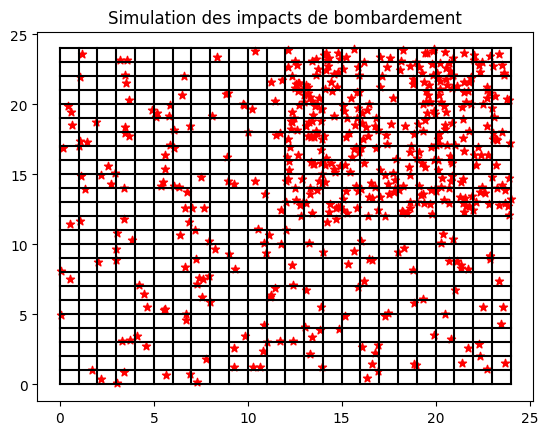

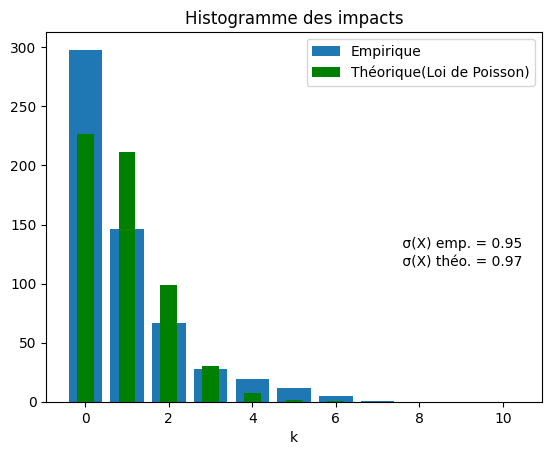

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import math

ncases=24
plt.figure()
cx = np.arange(ncases + 1)
cy = np.arange(ncases + 1)
CX, CY = np.meshgrid(cx, cy)
plt.plot(CX, CY, 'k')
plt.plot(CX.T, CY.T, 'k')
plt.title("Simulation des impacts de bombardement")

 
M = np.zeros(shape=(ncases,ncases), dtype=int) #génération de la matrice
Morientée = np.zeros(shape=(ncases,ncases), dtype=int) #génération de la matrice


nimpacts = 537 #on simule les impacts
for i in range(0,nimpacts):
    x = np.random.randint(ncases)
    y = np.random.randint(ncases)
    M[x][y] +=1

#si on voulait avoir un bombardment plus orienté différent
for i in range(0,nimpacts):
    if i%2:
        x = np.random.randint(ncases/2,ncases)
        y = np.random.randint(ncases/2,ncases)
    else:
        x = np.random.randint(ncases)
        y = np.random.randint(ncases)
    Morientée[x][y] +=1
        


for i in range(0,ncases): #on parcourt la matrice pour afficher les impacts
    for j in range(0,ncases):
        for k in range(0,Morientée[i][j]):
            randx = np.random.rand() # on rajoute un random sur x et y pour mieux visualiser les impacts
            randy = np.random.rand()
            plt.scatter(i+randx,j+randy,marker="*",color="r") # on affiche les impacts


M = M.flatten() # la liste de liste devient une liste
Morientée = Morientée.flatten()


# calculs de la loi de poisson
proba_théo = []
val_théo = []
lmbd = nimpacts/(ncases**2)
ecart_theo = round(math.sqrt(lmbd),2)
for i in range(10):
    val_théo.append(i)
    proba_théo.append((ncases**2)*((math.exp(-lmbd)*(lmbd**i))/math.factorial(i)))




plt.figure() #affichage de l'histogramme
hX, binsX, _ = plt.hist(Morientée,bins=np.arange(0,10+2)-0.5,rwidth=0.8,label="Empirique")
plt.bar(val_théo,proba_théo,width=0.4,label="Théorique(Loi de Poisson)",color='g')
plt.xlabel("k")
plt.legend(loc="upper right")
plt.title("Histogramme des impacts")
plt.text(7.5, 130, s = ' σ(X) emp. = '+str(round(np.std(M),2)))  
plt.text(7.5, 115, s = ' σ(X) théo. = '+str(ecart_theo))






